# Feature Selection using Pearson Correlation
For urea_saline_uvvis.csv dataset -- Urea in saline spectra measured with the reliable UV-Vis spec in the Bryers' Lab

In [3]:
# Imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.linear_model import BayesianRidge, LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

# Set seed
seed = 4

### Import Data

In [2]:
# Import data
data = pd.read_csv('Datasets/urea_saline_uvvis.csv')

In [26]:
data

,urea_concentration (mM),190,191,192,193,194,195,196,197,198,...,491,492,493,494,495,496,497,498,499,500
0,0.5,0.584,0.477,0.379,0.297,0.239,0.183,0.138,0.106,0.082,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
1,0.5,0.582,0.474,0.376,0.295,0.237,0.180,0.136,0.103,0.079,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001
2,0.5,0.598,0.483,0.386,0.303,0.247,0.189,0.145,0.113,0.089,...,-0.001,-0.001,0.000,-0.001,-0.001,-0.001,-0.001,-0.001,0.000,0.000
3,4.0,1.792,1.859,1.862,1.713,1.441,1.154,0.883,0.681,0.516,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
4,4.0,1.778,1.841,1.863,1.732,1.469,1.178,0.905,0.695,0.524,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000
5,4.0,1.788,1.846,1.856,1.721,1.456,1.169,0.895,0.687,0.517,...,-0.001,0.000,0.000,0.000,0.000,-0.001,-0.001,0.000,0.000,0.000
6,8.0,1.829,1.910,2.000,2.050,1.999,1.868,1.584,1.274,0.985,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001
7,8.0,1.819,1.915,2.006,2.050,2.005,1.873,1.597,1.289,0.996,...,0.000,0.001,0.001,0.001,0.000,0.000,0.001,0.001,0.001,0.001
8,8.0,1.816,1.909,1.997,2.056,2.008,1.867,1.593,1.285,0.995,...,-0.001,-0.001,0.000,-0.001,0.000,-0.001,-0.001,-0.001,0.000,0.000
9,15.0,1.862,1.944,2.051,2.111,2.110,2.114,2.107,1.971,1.670,...,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,-0.001,0.000


In [7]:
targets = data['urea_concentration (mM)']
features = data.iloc[:,1:313]

Train test split

In [9]:
# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

## Feature Selection by Pearson Correlation Coefficient per Feature
from Jason Brownlee [here](https://machinelearningmastery.com/feature-selection-for-regression-data/)  
I added a feature selection list that gathers scores and indices of features > 10

Feature 0: 0.009419
Feature 1: 1.018881
Feature 2: 1.205187
Feature 3: 0.000138
Feature 4: 0.167511
Feature 5: 5.985083
Feature 6: 0.062405
Feature 7: 1.455257
Feature 8: 0.420384
Feature 9: 101.392225
Feature 10: 0.387091
Feature 11: 1.581124
Feature 12: 3.014463
Feature 13: 0.232705
Feature 14: 0.076281
Feature 15: 4.299652
Feature 16: 1.497530
Feature 17: 0.261242
Feature 18: 5.960005
Feature 19: 0.523219
Feature 20: 0.003365
Feature 21: 0.024178
Feature 22: 0.220958
Feature 23: 0.576770
Feature 24: 0.627198
Feature 25: 0.350687
Feature 26: 0.281877
Feature 27: 0.584210
Feature 28: 52.196337
Feature 29: 0.046855
Feature 30: 0.147323
Feature 31: 0.368485
Feature 32: 0.077631
Feature 33: 0.698140
Feature 34: 45.744046
Feature 35: 2.047376
Feature 36: 0.786270
Feature 37: 0.996190
Feature 38: 2.733533
Feature 39: 63.957656
Feature 40: 231.885540
Feature 41: 1.372448
Feature 42: 0.581860
Feature 43: 1.072930
Feature 44: 1.066976
Feature 45: 0.344656
Feature 46: 13.951551
Feature 47: 3.5

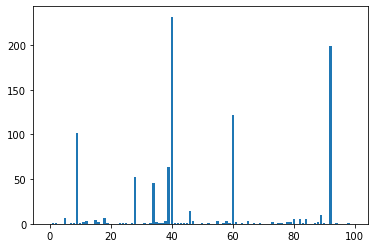

In [20]:
# example of correlation feature selection for numerical data
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
feat_numba = []
feat_score = []
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    if fs.scores_[i] > 10:
        feat_numba.append(i)
        feat_score.append(fs.scores_[i])
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

The above plot shows the correlation feature importance is scattered.  I chose the features with a Pearson correlation above 10.

In [23]:
#Select features with correlation <10
targets = data['urea_concentration (mM)']
features = data.iloc[:, feat_numba]

In [24]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

Text(0.5, 1.0, 'Scores of test set')

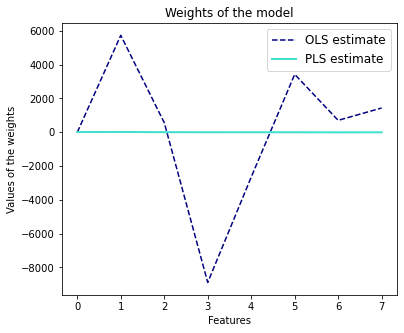

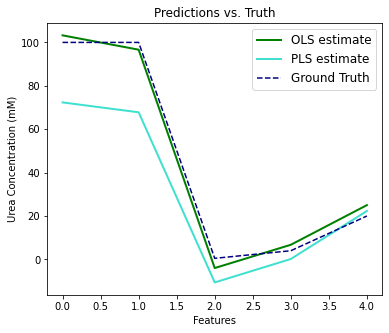

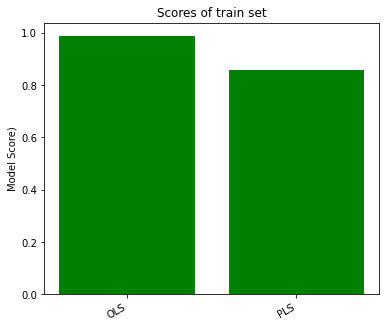

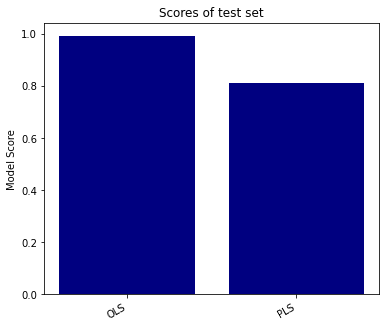

In [25]:
# Initiate models and fit to train datasets
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)


# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")

plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")

plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models

y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Calculate and plot scores for each model

models = [ols, pls]
model_names = ['OLS', 'PLS']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score)")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')

## Do the same thing with POUR data in saline measured with UV-Vis

In [27]:
# Import data
data = pd.read_csv('Datasets/pour_saline_uvvis.csv')

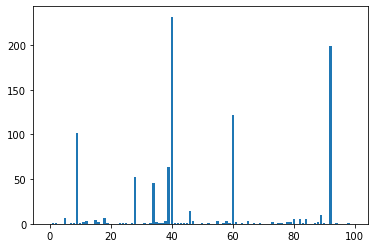

In [35]:
targets = data['Urea Concentration (mM)']
features = data.iloc[:,4:616]

# First make train and test datasets
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_regression, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

# load the dataset
X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
feat_numba = []
feat_score = []
for i in range(len(fs.scores_)):
    #print('Feature %d: %f' % (i, fs.scores_[i]))
    if fs.scores_[i] > 10:
        feat_numba.append(i)
        feat_score.append(fs.scores_[i])
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

Text(0.5, 1.0, 'Scores of test set')

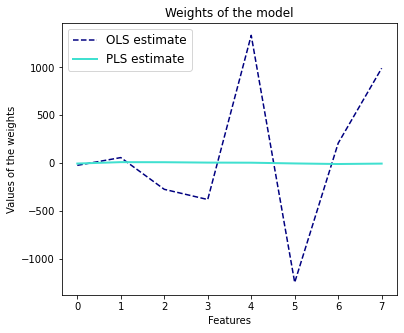

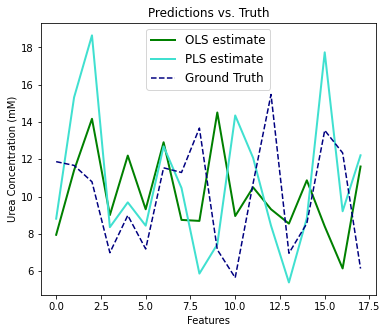

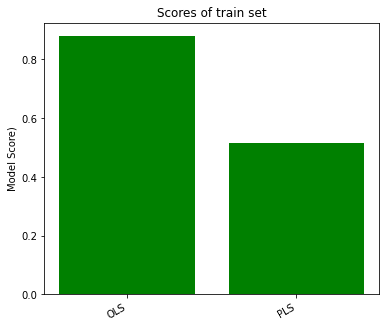

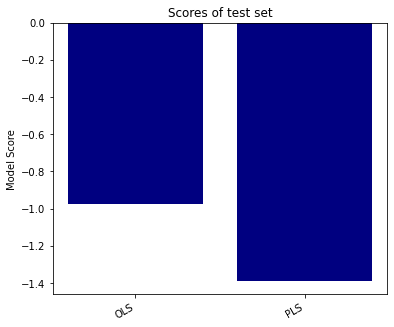

In [34]:
#Select features with correlation <10
targets = data['Urea Concentration (mM)']
features = data.iloc[:, feat_numba]

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=seed, shuffle=True)

# Flatten y
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

# Initiate models and fit to train datasets
ols = LinearRegression().fit(X_train, y_train)
pls = PLSRegression().fit(X_train, y_train)


# #############################################################################
# Plot true weights, estimated weights, histogram of the weights, and
# predictions with standard deviations
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Weights of the model")

plt.plot(ols.coef_, color="navy", linestyle="--", label="OLS estimate")
plt.plot(pls.coef_, color="turquoise", linewidth=lw, label="PLS estimate")

plt.xlabel("Features")
plt.ylabel("Values of the weights")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Make predictions on test set using models

y_ols_predict = ols.predict(X_test)
y_pls_predict = pls.predict(X_test)


# Plot predictions vs. truth
lw = 2
plt.figure(figsize=(6, 5))
plt.title("Predictions vs. Truth")
plt.plot(y_ols_predict, color="green", linewidth=lw, label="OLS estimate")
plt.plot(y_pls_predict, color="turquoise", linewidth=lw, label="PLS estimate")

plt.plot(y_test, color="navy", linestyle="--", label="Ground Truth")
plt.xlabel("Features")
plt.ylabel("Urea Concentration (mM)")
plt.legend(loc="best", prop=dict(size=12))

# #############################################################################
# Calculate and plot scores for each model

models = [ols, pls]
model_names = ['OLS', 'PLS']
train_scores = []
test_scores = []
for model in models:
    train_scores.append(model.score(X_train, y_train))
    test_scores.append(model.score(X_test, y_test))
    
# Plot model scores
plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=train_scores, color='green')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score)")
plt.title('Scores of train set')

plt.figure(figsize=(6, 5))
plt.bar(x=model_names, height=test_scores, color='navy')
plt.xticks(rotation=30, ha='right')
plt.ylabel("Model Score")
plt.title('Scores of test set')